<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

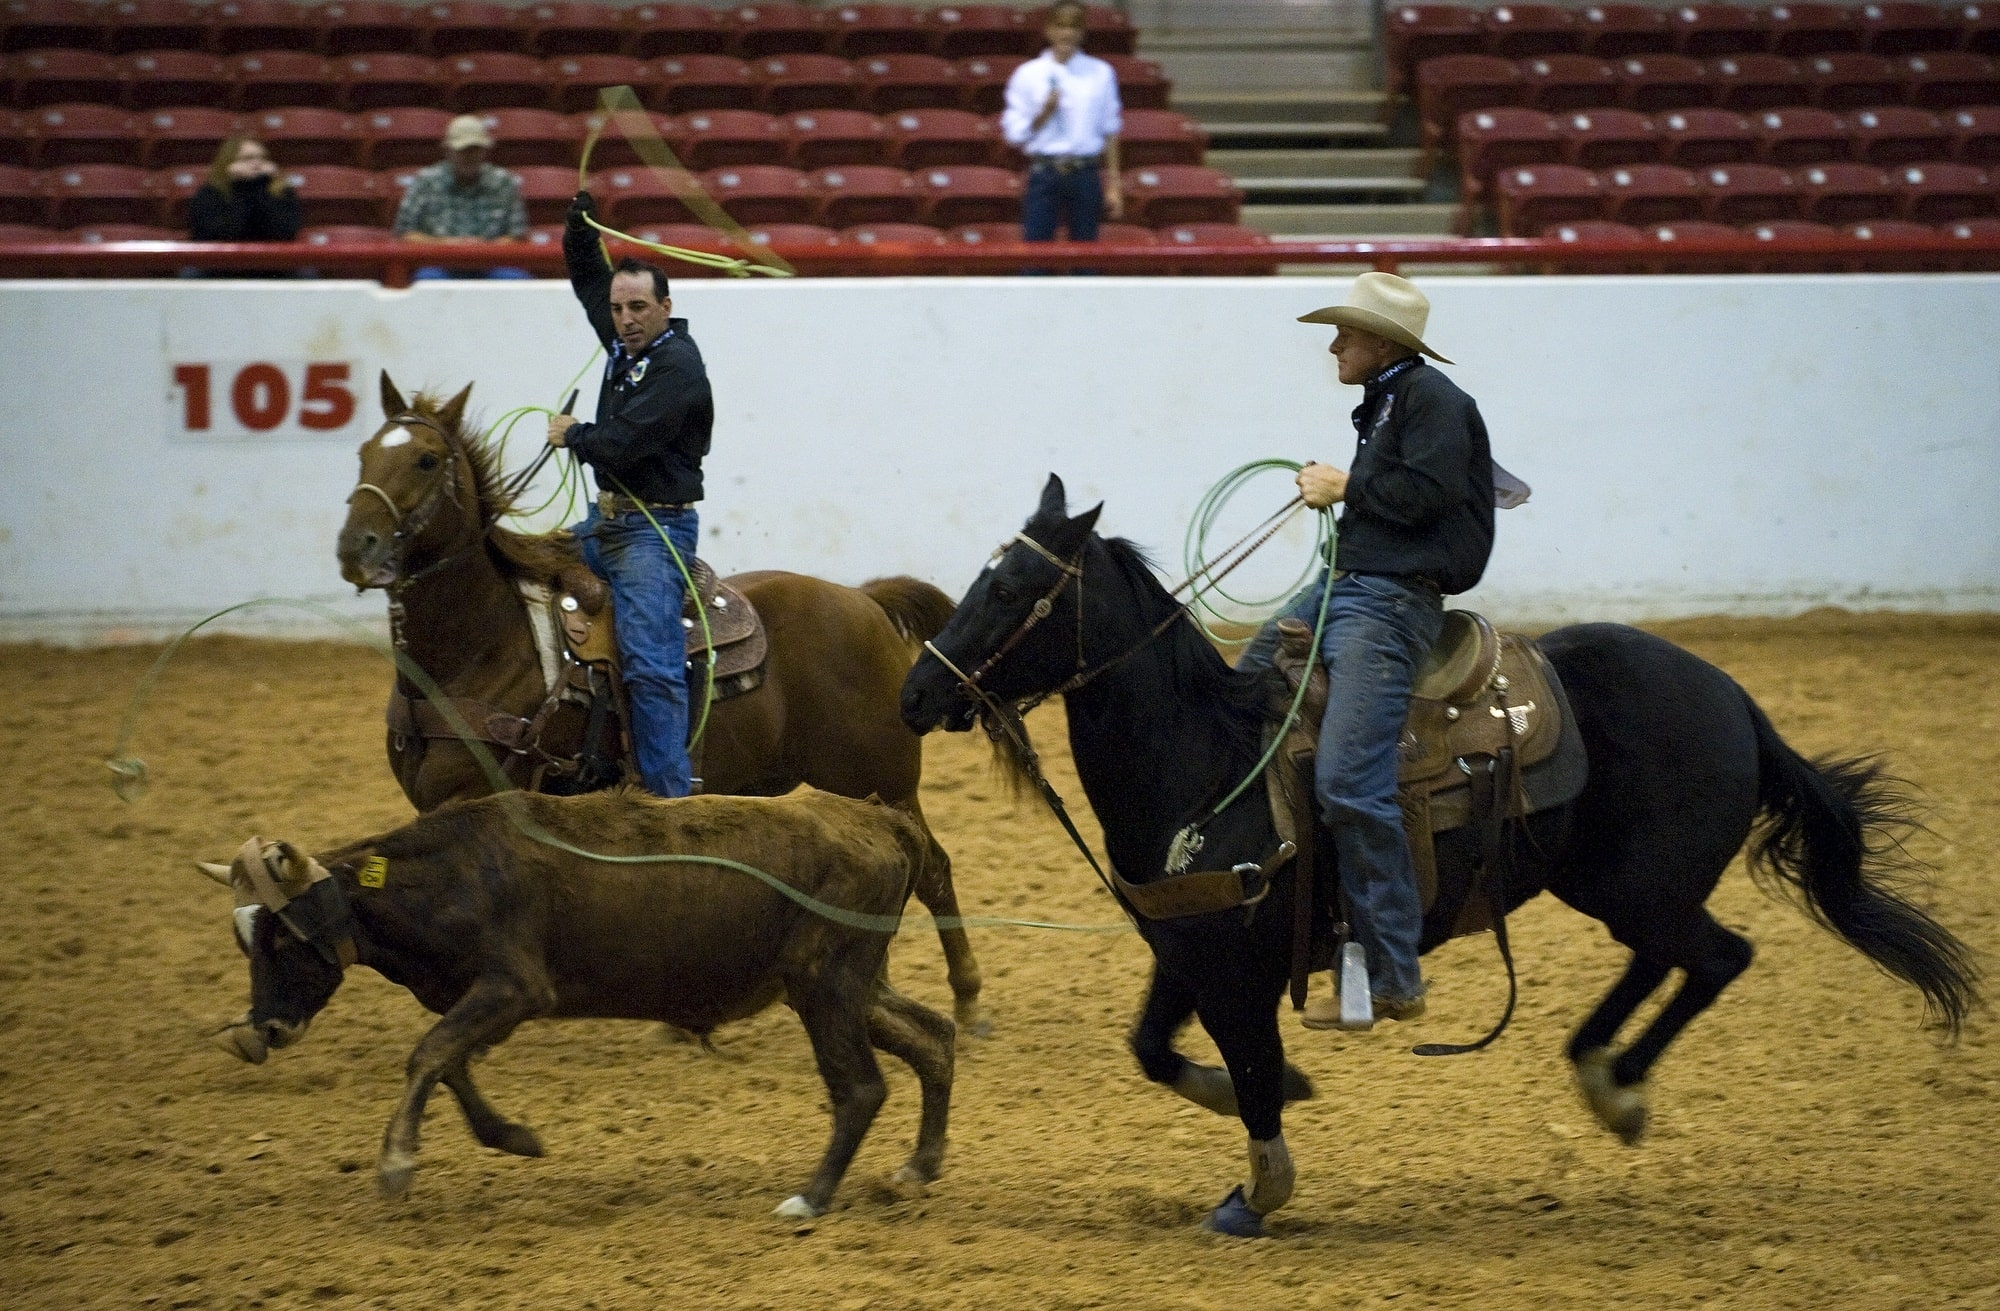

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

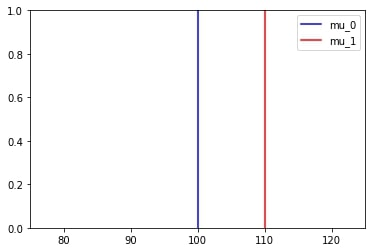

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

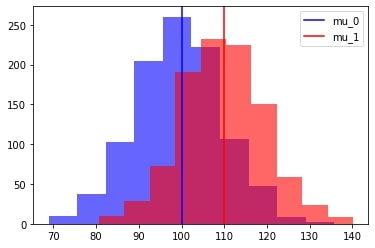

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

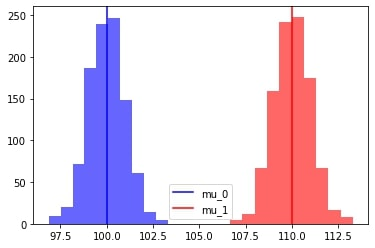

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [14]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [15]:
# Write your code to read in the files and add the year values from each csv:

import pandas as pd

cfb16 = pd.read_csv(cfb16_url)
cfb17 = pd.read_csv(cfb17_url)
cfb18 = pd.read_csv(cfb18_url)
cfb19 = pd.read_csv(cfb19_url)
cfb20 = pd.read_csv(cfb20_url)


cfb16["Year"] = 2016
cfb17["Year"] = 2017
cfb18["Year"] = 2018
cfb19["Year"] = 2019
cfb20["Year"] = 2020


## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [16]:
# Write your code to combine all of the csvs into one dataframe here:

all_seasons = [cfb16, cfb17, cfb18, cfb19, cfb20]

cfb = pd.concat(all_seasons, ignore_index=True)


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [17]:
# Write your code to parse the conference from the team name:

splitter = cfb["Team"].str.split("(", n=1, expand=True)

cfb["Team"] = splitter[0].str.strip()

cfb["Conference"] = splitter[1].str.strip(")")


## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

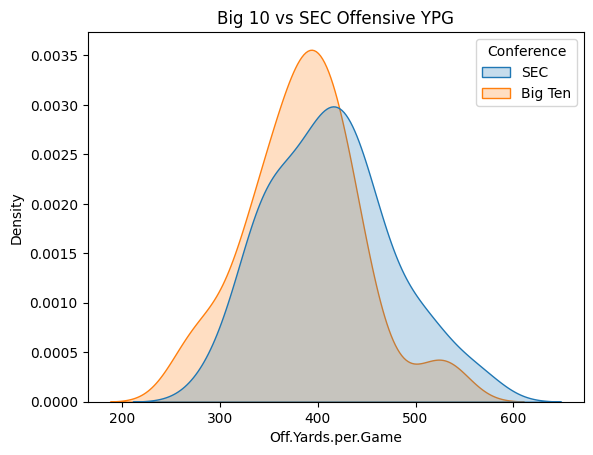

,Off.Yards.per.Game
Conference,
Big Ten,385.564286
SEC,412.788571


In [18]:
# Write the code for the statistical differences for Off.Yards.per.Game:

import seaborn as sns
import matplotlib.pyplot as plt


sec_big10 = cfb[cfb["Conference"].isin(["Big Ten", "SEC"])]

sns.kdeplot(data = sec_big10, x="Off.Yards.per.Game", hue="Conference", fill=True)

plt.title("Big 10 vs SEC Offensive YPG")

plt.show()

sec_big10.groupby("Conference")["Off.Yards.per.Game"].mean()


The SEC has a higher average of offense YPG than the Big 10 does(412.79 compared to 385.56). It's curve skews slightly to the right. However, there is a lot of overlap between the two curves, which shows that a lot of big 10 teams perform on par with SEC teams in terms of YPG.



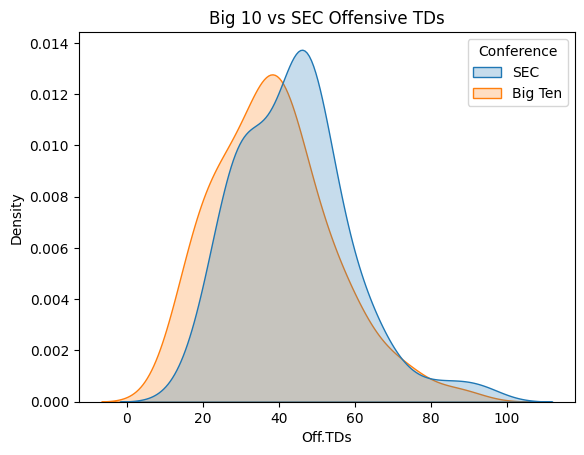

,Off.TDs
Conference,
Big Ten,38.642857
SEC,43.771429


In [19]:
# Write the code for the statistical differences for Off.TDs:

sns.kdeplot(data = sec_big10, x="Off.TDs", hue="Conference", fill=True)

plt.title("Big 10 vs SEC Offensive TDs")

plt.show()


sec_big10.groupby("Conference")["Off.TDs"].mean()


This comparison is fairly similar to the one above. The SEC averages a bit more than 5 more offensive TDs per season than the Big 10. Its curve again skews to the right slightly. However, there is a lot of overlap between the two curves, suggesting the Big 10's performance is largely comparable.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



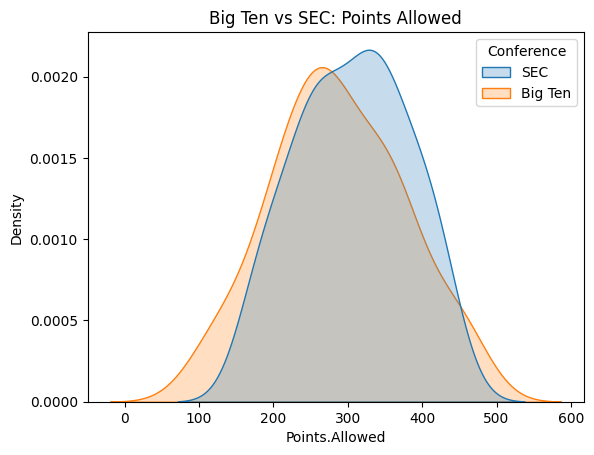

,Points.Allowed
Conference,
Big Ten,286.328571
SEC,306.128571


In [20]:
# Write the code for the statistical differences for Points.Allowed:

sns.kdeplot(data=sec_big10, x="Points.Allowed", hue="Conference", fill=True)

plt.title("Big Ten vs SEC: Points Allowed")

plt.show()

sec_big10.groupby("Conference")["Points.Allowed"].mean()



The big 10 allowed fewer points per season than the sec did (286 vs 306). In the plot, the SEC's peak sits to the right of the Big 10's peak. However, the Big 10 has tails that extend beyond those of the SEC on both sides. This suggest higher variance in points allowed per season than the SEC. There is a lot of overlap again between the two curves, suggesting a lot of teams between the conferences performed similarly.

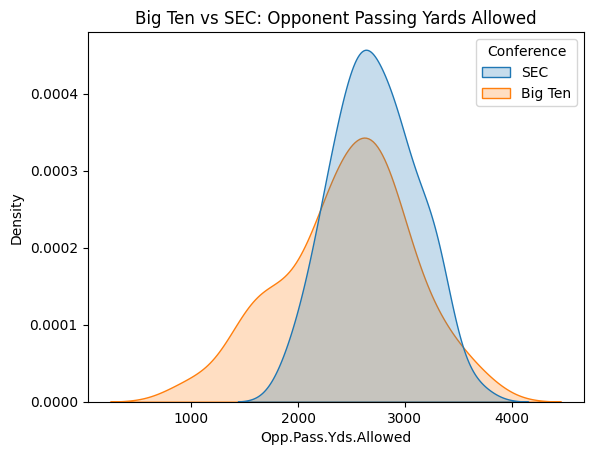

,Opp.Pass.Yds.Allowed
Conference,
Big Ten,2454.857143
SEC,2716.300000


In [21]:

# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:

sns.kdeplot(data=sec_big10, x="Opp.Pass.Yds.Allowed", hue="Conference", fill=True)

plt.title("Big Ten vs SEC: Opponent Passing Yards Allowed")

plt.show()

sec_big10.groupby("Conference")["Opp.Pass.Yds.Allowed"].mean()


The big 10 averaged slightly less opponent passing yards allowed per season than the SEC (2455 vs 2716). However, the big 10 curve shows high variance as its curve's tails stretche far to the left of the SEC's and a bit to the right of them as well. there is less overlap in this comparison than in the previous comparisons. This suggests that the big 10 has high variance than the SEC in opponent passing yards allowed, but the big 10 also hass more elite passing defenses than the SEC has. The SEC curve is low variance, suggesting most of their defenses perform around the same level.

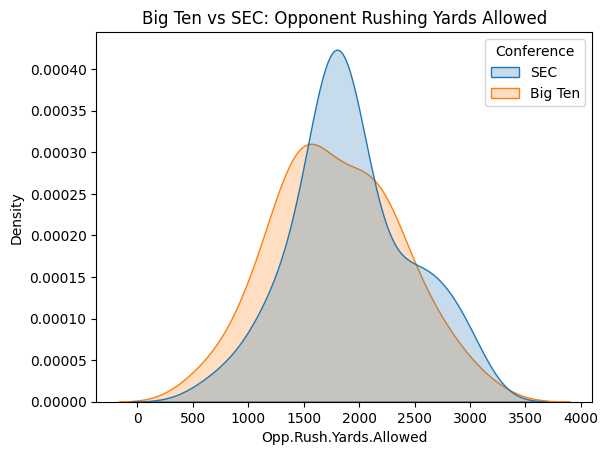

,Opp.Rush.Yards.Allowed
Conference,
Big Ten,1794.057143
SEC,1920.971429


In [22]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:

sns.kdeplot(data=sec_big10, x="Opp.Rush.Yards.Allowed", hue="Conference", fill=True)

plt.title("Big Ten vs SEC: Opponent Rushing Yards Allowed")

plt.show()

sec_big10.groupby("Conference")["Opp.Rush.Yards.Allowed"].mean()


The big 10 averaged less rushing yards allowed than the SEC on average (1794 vs 1920). There is a lot of overlap in the curves, suggesting that the defenses performed comparably in this statistic across the conferences. The tail of the of the Big 10's curve extends further left than the SEC's tail, suggesting higher variance in Big 10 defenses against the run.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

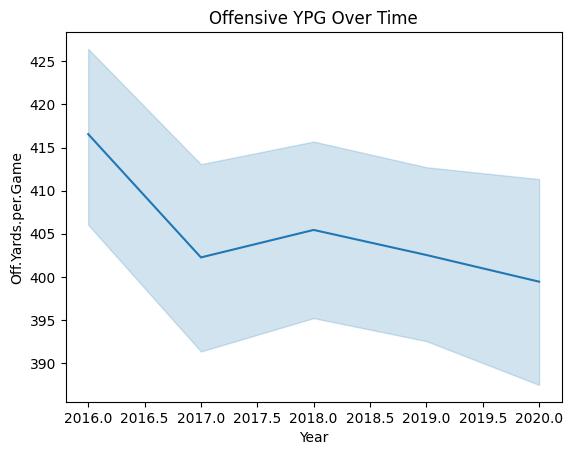

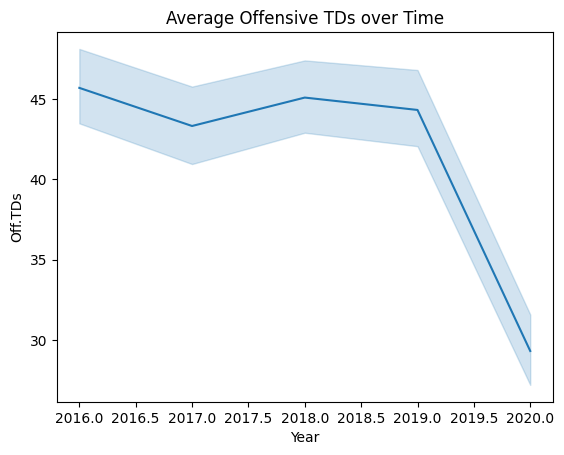

            mean        std
Year                       
2016  416.558621  60.311291
2017  402.250388  61.949764
2018  405.440310  58.126804
2019  402.530769  59.017147
2020  399.435433  69.152887
           mean        std
Year                      
2016  45.681034  12.992037
2017  43.310078  13.189602
2018  45.077519  13.431896
2019  44.307692  14.224036
2020  29.314961  13.060118


In [26]:
# Create a few plots showing how each metric changed over time:

sns.lineplot(data=cfb, x="Year", y="Off.Yards.per.Game")

plt.title("Offensive YPG Over Time")

plt.show()

sns.lineplot(data=cfb, x="Year", y="Off.TDs")

plt.title("Average Offensive TDs over Time")

plt.show()


print(cfb.groupby("Year")["Off.Yards.per.Game"].agg(["mean", "std"]))

print(cfb.groupby("Year")["Off.TDs"].agg(["mean", "std"]))

From 2016-2020, offenses displayed some changes over time. The mean YPG for offenses declined from 417 in 2016 to 399 in 2020. The Standard Deviation were between 60-70 yards across all years. This means that the trend is spurious because a lot of teams likely still gained yardage in 2020 that was on par with their previous seasons.

The mean TDs scored per season across this same time frame was consistenly between 43 and 46, until it dropped sharply to 29 in 2020. The standard deviations across all years were right around 13. Because the sharp change in 2020 is bigger than typical variablity, this trend is likely a real change in offensive production.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

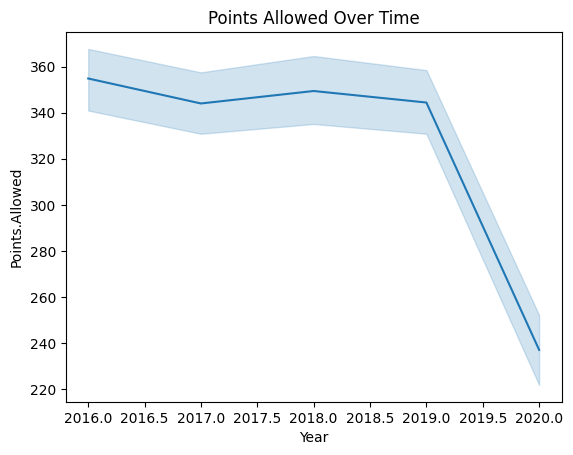

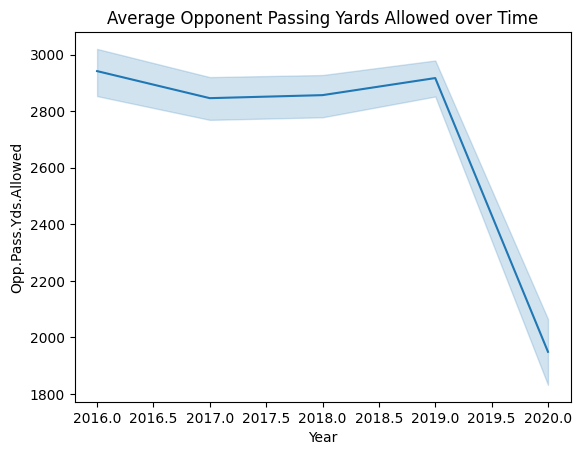

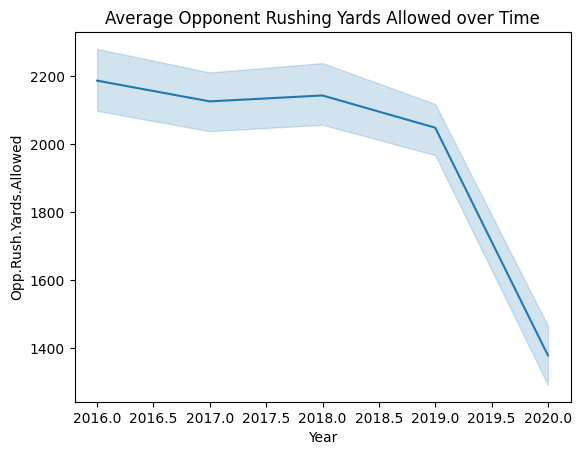

            mean        std
Year                       
2016  354.818966  76.005217
2017  343.976744  79.907707
2018  349.387597  82.311936
2019  344.384615  76.350719
2020  237.055118  86.315893
             mean         std
Year                         
2016  2941.612069  469.792605
2017  2845.961240  448.807820
2018  2856.658915  443.457571
2019  2917.038462  388.231698
2020  1948.937008  660.804653
             mean         std
Year                         
2016  2186.801724  500.023099
2017  2125.868217  489.201173
2018  2143.255814  537.054107
2019  2048.492308  476.154350
2020  1379.511811  482.023296


In [28]:
# Create a few plots showing how each metric changed over time:

sns.lineplot(data=cfb, x="Year", y="Points.Allowed")

plt.title("Points Allowed Over Time")

plt.show()


sns.lineplot(data=cfb, x="Year", y="Opp.Pass.Yds.Allowed")

plt.title("Average Opponent Passing Yards Allowed over Time")

plt.show()


sns.lineplot(data=cfb, x="Year", y="Opp.Rush.Yards.Allowed")

plt.title("Average Opponent Rushing Yards Allowed over Time")

plt.show()


print(cfb.groupby("Year")["Points.Allowed"].agg(["mean", "std"]))

print(cfb.groupby("Year")["Opp.Pass.Yds.Allowed"].agg(["mean", "std"]))

print(cfb.groupby("Year")["Opp.Rush.Yards.Allowed"].agg(["mean", "std"]))


Between 2016-2020, the average points allowed per season declined slowly from 355(2016) to 344(2019) until it plummeted in 2020 to 237. Standard deviations were consistenly large (between 76 and 86), but the decline in 202 was much larger than expected variablity, so this likely reflects real change.

Average opponent passing yards allowed were relatively stable over the same time frame from 2,846(2016)- 2,942(2019), until they also fell quickly to 1,949 in 2020. Std deviations were between 389-470. This percipitous drop also suggests a real change.

Average opponent rushing yards allowed were also stable in the same time frame 2048(2016) - 2187(2019) with standard deviations between 476-537. This also changed dramatically in 2020, dropping to a mean of 1,380. This 700 yard change relects a real change is likely to have occurred.

The real change that occured across all of these categories is likely due to the shortened college football season in 2020 because of the COVID pandemic.